### Advanced Machine Learning

# Home Exercise #1


Jonathan Schler


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# add more imports as needed
import math
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

## Task 1 Predicting Airbnb NYC Listing Prices Using Linear Regression Methods 

Dataset Details:
- Airbnb New York City Dataset
- Contains listings information including location, room type, price, number of reviews, etc.
- Can be found on Kaggle [here](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data): 

Objective:
- To apply Linear Regression to the Airbnb NYC dataset, a contemporary and rich dataset with diverse data types.
- To practice advanced data preprocessing techniques including handling text and spatial data.
- To gain insights into the factors affecting Airbnb listings and prices in New York City.

In [16]:
df = pd.read_csv("AB_NYC_2019.csv")

In [17]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [19]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Question 1.1
Visualize the univariate distribution of each continuous attribute, and the distribution of the target. Make sure you skip the string\categorial columns (you can do it using call to `select_dtypes(exclude=['object'])`).

Do you notice anything? Is there something that might require special treatment?

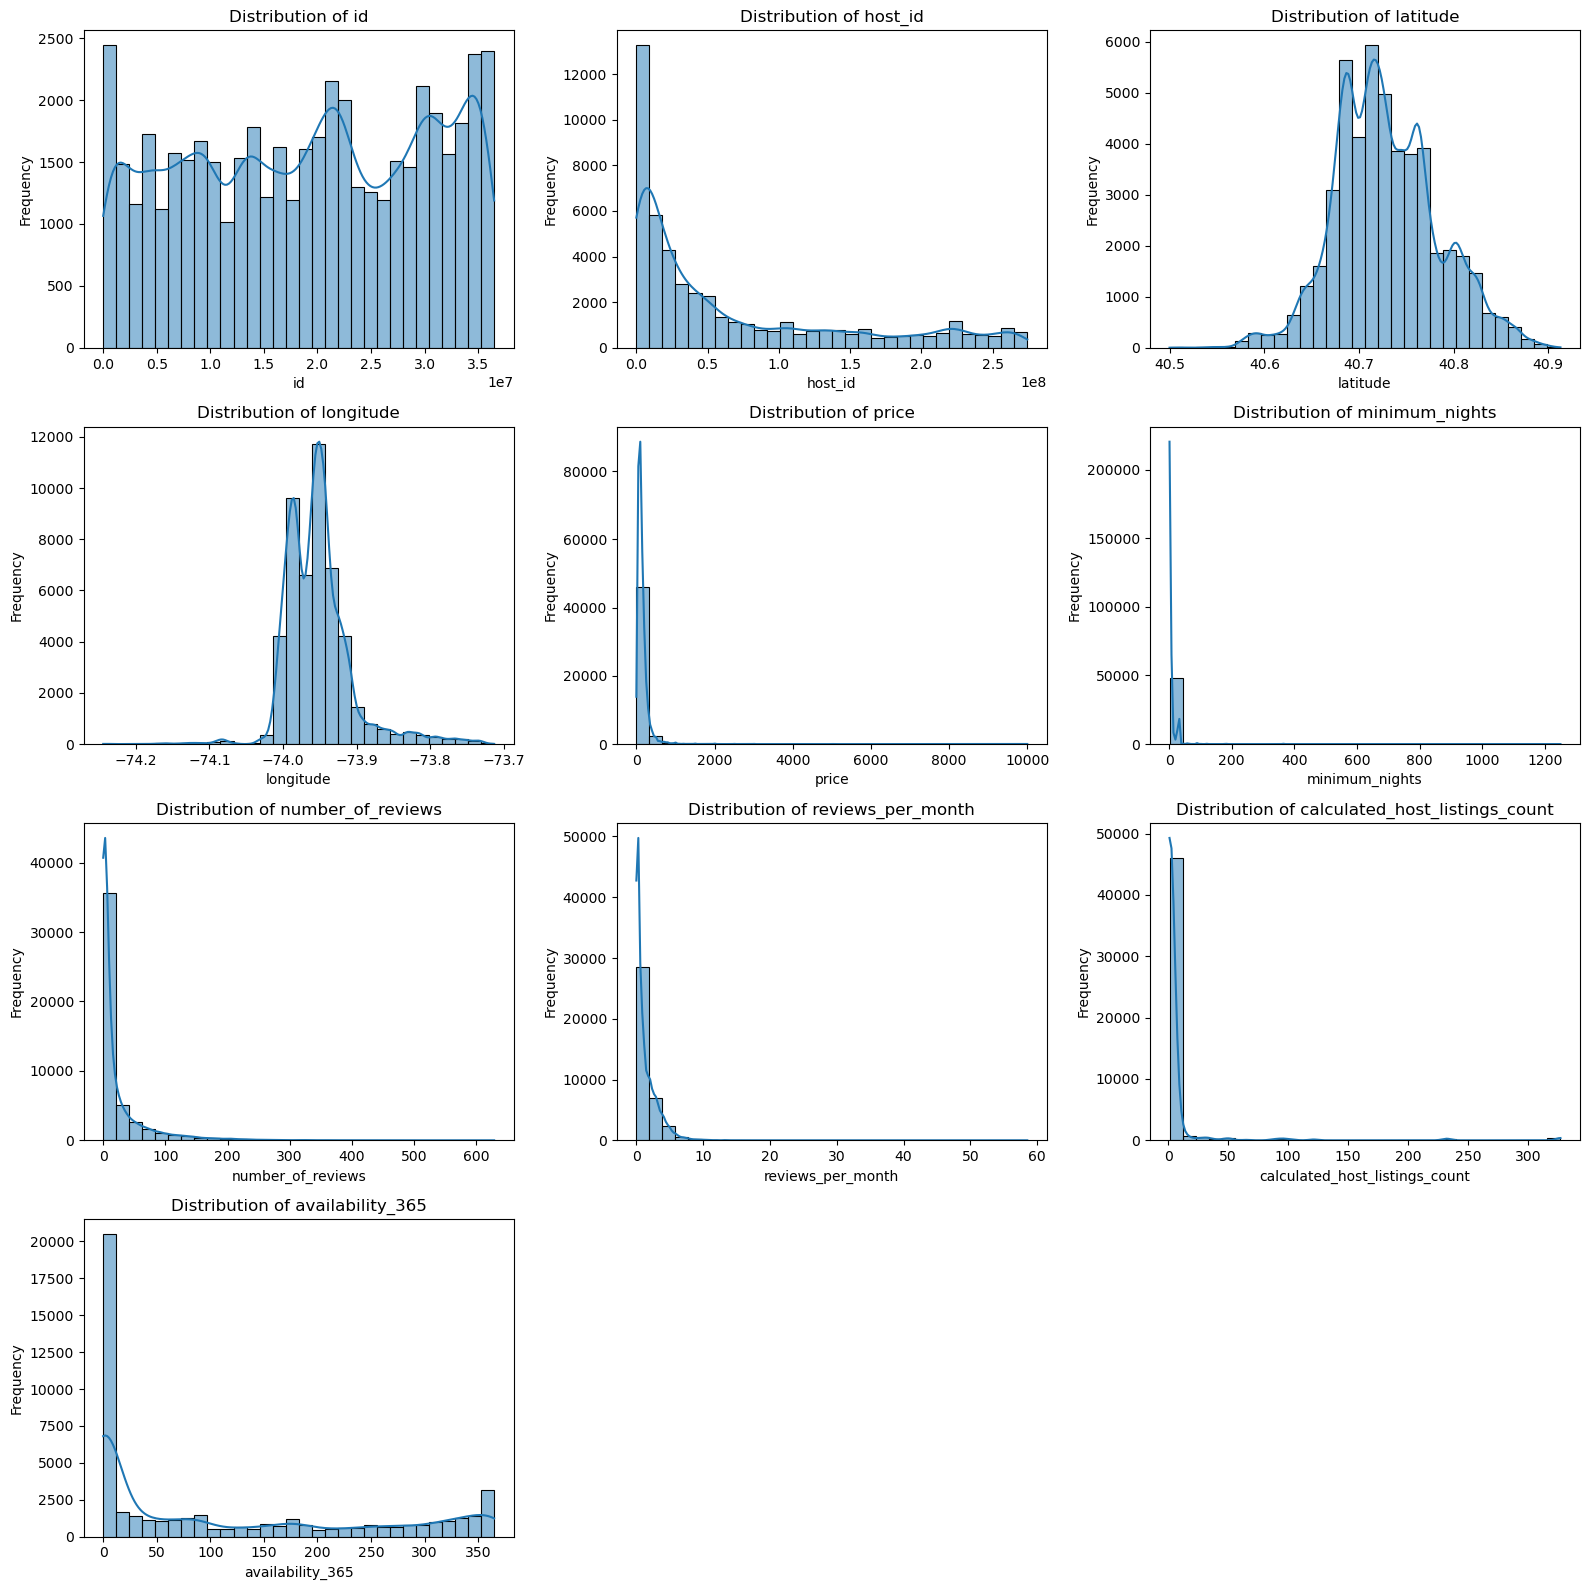

In [20]:
continuous_columns = df.select_dtypes(exclude=['object']).columns.to_list()
num_plots = len(continuous_columns)
cols = 3  
rows = math.ceil(num_plots / cols)  

plt.figure(figsize=(16, rows * 4))  
for i, col in enumerate(continuous_columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Explanation

**Price**

Most prices are on the lower end and there are few above it so the outliers can be handled for better predictions.

**Minimum nights**

Most listings have a fairly low amount of minimum nights, up to 30. There is very few listings above this number of minimum nights

**Latitude and longtitude**

We can see that there are two main categories (or groups) of them (we can look at it also as one category)

**Number of review and review per month**

We can see that there’s a typical range for the number of reviews, but there are also some outliers.

In [21]:
print(f"Total listings: {df.shape[0]}")
print(f"Listings with price > 600: {df[df['price'] > 600].shape[0]}")
print(f"Listings with price <= 600: {df[df['price'] <= 600].shape[0]}")
print(f"Listings with minimum nights > 30: {df[df['minimum_nights'] > 30].shape[0]}")

Total listings: 48895
Listings with price > 600: 778
Listings with price <= 600: 48117
Listings with minimum nights > 30: 747


### Question 1.2
Visualize the dependency of the target on each continuous feature (2d scatter plot).

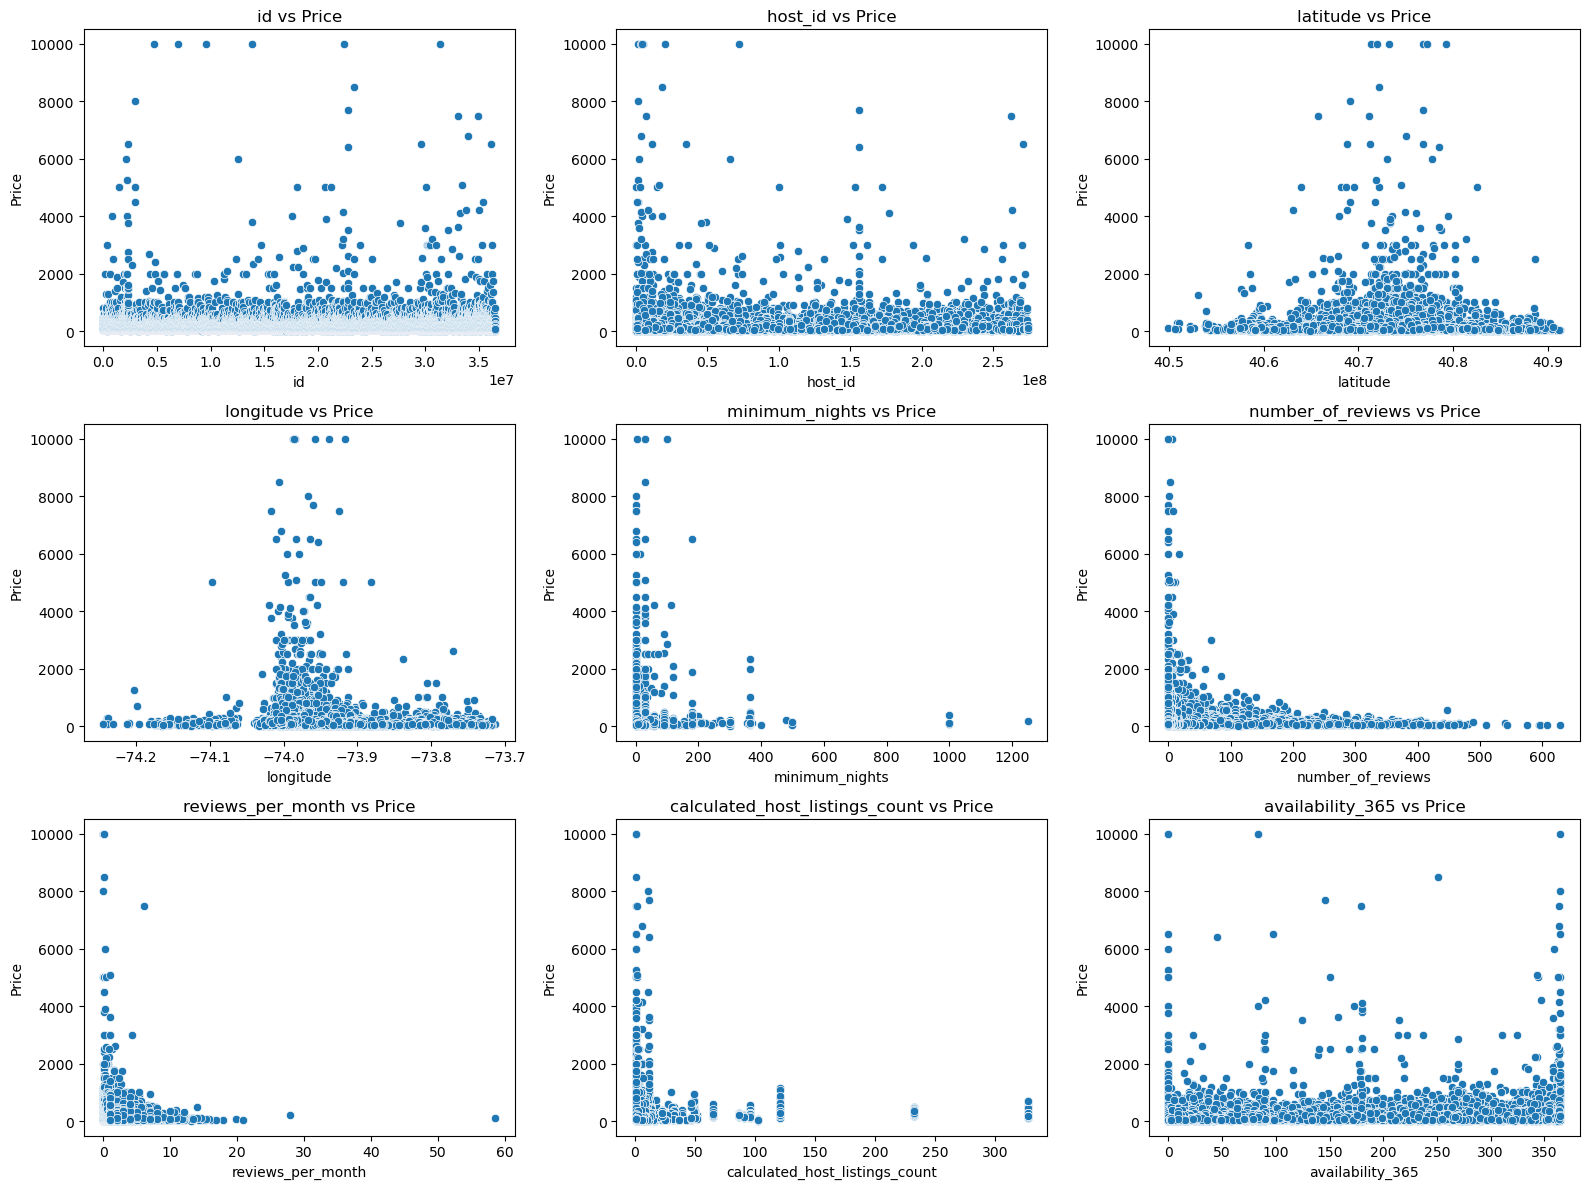

In [22]:
# your code here

continuous_features = [col for col in df.select_dtypes(exclude=['object']).columns if col != 'price']
num_features = len(continuous_features)
cols = 3  
rows = math.ceil(num_features / cols)

plt.figure(figsize=(16, rows * 4))

for i, feature in enumerate(continuous_features, 1):
    plt.subplot(rows, cols, i)
    sns.scatterplot(x=df[feature], y=df['price'])
    plt.title(f'{feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

### Question 1.3
Split data in training and test set. Do not use the test-set unless for a final evaluation in 1.6.
For each categorical variable, cross-validate a Linear Regression model using just this variable
(one-hot-encoded). Visualize the relationship of the categorical variables that provide the best
R^2 value with the target.

Best categorical variable: room_type, R^2: 0.06956295270621858


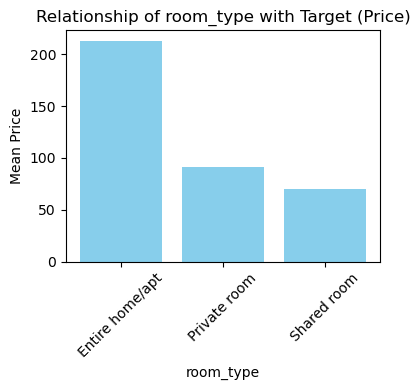

In [23]:
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_columns = X_train.select_dtypes(include=['object']).columns

results = {}

for col in categorical_columns:
    ohe = OneHotEncoder(drop='first')
    X_transformed = ohe.fit_transform(X_train[[col]])
    
    model = LinearRegression()
    scores = cross_val_score(model, X_transformed, y_train, cv=10, scoring='r2')
    mean_r2 = np.mean(scores)
    results[col] = mean_r2

best_variable = max(results, key=results.get)
print(f"Best categorical variable: {best_variable}, R^2: {results[best_variable]}")

ohe_best = OneHotEncoder()
X_best_transformed = ohe_best.fit_transform(X_train[[best_variable]])

ohe_categories = ohe_best.categories_[0]

X_best_dense = X_best_transformed.toarray()
category_sums = X_best_dense.sum(axis=0)

y_train_array = y_train.values

category_y_sums = X_best_dense.T @ y_train_array

category_means = pd.DataFrame({
    'Category': ohe_categories,
    'Mean Price': category_y_sums / category_sums
})

# Visualize
plt.figure(figsize=(4, 4))
plt.bar(category_means['Category'], category_means['Mean Price'], color='skyblue')
plt.title(f'Relationship of {best_variable} with Target (Price)')
plt.xlabel(best_variable)
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Question 1.4
Use ColumnTransformer and pipeline to encode categorical variables. Evaluate Linear
Regression (OLS), Ridge, Lasso and ElasticNet using cross-validation with the default
parameters. Does scaling the data (within the pipeline) with StandardScaler help?

In [24]:
# Initial preprocessing
df = df.drop(["id", "name","host_id","host_name","neighbourhood", "last_review"], axis=1)

# Numbering of reviews == 0 means reviews_per_month == NaN so fill with 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df.isnull().sum()

# Additional preprocessing
df[df['calculated_host_listings_count'] > 15].shape[0]

df = df[df['price'] <= 600]
df = df[df['minimum_nights'] <= 30]

In [25]:
X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

preprocess_unscaled = make_column_transformer(
    (OneHotEncoder(), ['neighbourhood_group','room_type'])
)

preprocess_scaled = make_column_transformer(
    (StandardScaler(), ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 
                                   'reviews_per_month', 'calculated_host_listings_count', 'availability_365']),
    (OneHotEncoder(), ['neighbourhood_group','room_type'])
)

models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet()
]

print("Without scaling:")
for model in models:
    pipeline = make_pipeline(preprocess_unscaled, model)
    scores = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='r2')
    print(f"{model}: {np.mean(scores)}")

print("\nWith scaling:")
for model in models:
    pipeline = make_pipeline(preprocess_scaled, model)
    scores = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='r2')
    print(f"{model}: {np.mean(scores)}")

Without scaling:
LinearRegression(): 0.35144216808767337
Ridge(): 0.3514423062216983
Lasso(): 0.34749718899118787
ElasticNet(): 0.2497985708523313

With scaling:
LinearRegression(): 0.39748637324720504
Ridge(): 0.3974864064741646
Lasso(): 0.3862560704680703
ElasticNet(): 0.2934523733071502


### Question 1.5
Tune the parameters of the models using GridSearchCV. Do the results improve?
Visualize the dependence of the validation score on the parameters for Ridge, Lasso and
ElasticNet.

Best Params: {'regressor': Ridge(), 'regressor__alpha': 1}
Test Score (R²): 0.4084908858121693


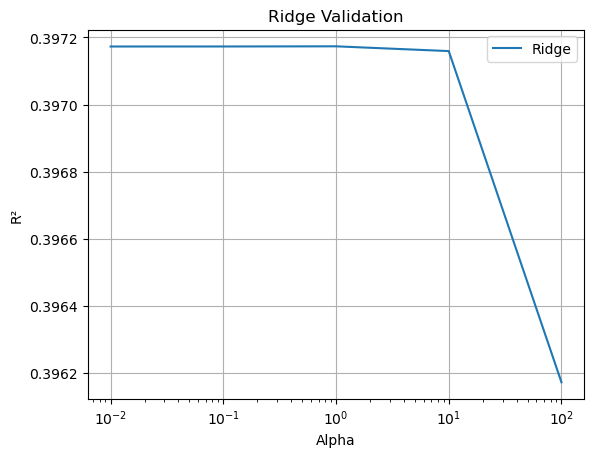

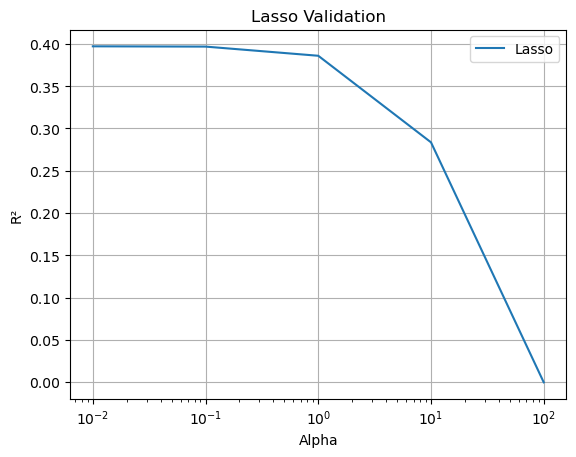

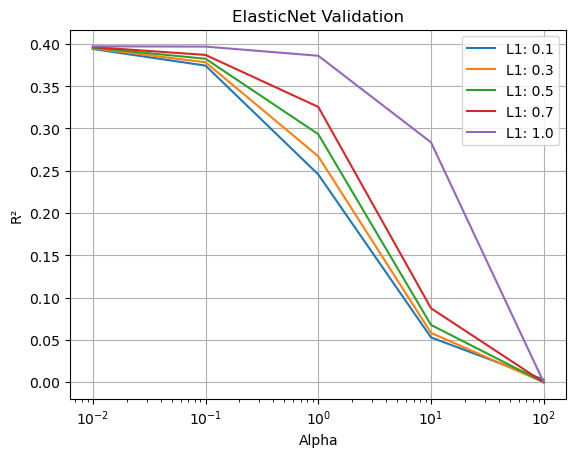

In [26]:
X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


# Preprocessing
preprocess = make_column_transformer(
    (StandardScaler(), ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 
                                   'reviews_per_month', 'calculated_host_listings_count', 'availability_365']),
    (OneHotEncoder(), ['neighbourhood_group','room_type'])
)

# Pipeline
pipe = Pipeline(
    steps=[
        ("preprocessor", preprocess),
        ("regressor", Ridge())
    ]
)

param_grid = [
    {
        'regressor': [Ridge(), Lasso()],
        'regressor__alpha': [0.01, 0.1, 1, 10, 100]
    },
    {
        'regressor': [ElasticNet()],
        'regressor__alpha': [0.01, 0.1, 1, 10, 100],
        'regressor__l1_ratio': [0.1,0.3,0.5,0.7,1.0]
    }
]

# GridSearch
grid = GridSearchCV(pipe, param_grid, cv=5, scoring="r2")
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
r2 = grid.score(X_test, y_test)
print("Test Score (R²):", r2)


cv = pd.DataFrame(grid.cv_results_)

for m in ["Ridge", "Lasso", "ElasticNet"]:
    res = cv[cv['param_regressor'].map(lambda x: x.__class__.__name__) == m]
    if m == "ElasticNet":
        for r in res['param_regressor__l1_ratio'].dropna().unique():
            sub = res[res['param_regressor__l1_ratio'] == r]
            plt.plot(
                sub['param_regressor__alpha'],
                sub['mean_test_score'],
                label=f"L1: {r}"
            )
    else:
        plt.plot(
            res['param_regressor__alpha'],
            res['mean_test_score'],
            label=m
        )
    plt.xscale("log")
    plt.xlabel("Alpha")
    plt.ylabel("R²")
    plt.title(f"{m} Validation")
    plt.legend(loc="best")
    plt.grid(visible=True)
    plt.show()

### Question 1.6
Visualize the coefficients of the resulting models. Do they agree on which features are
important?

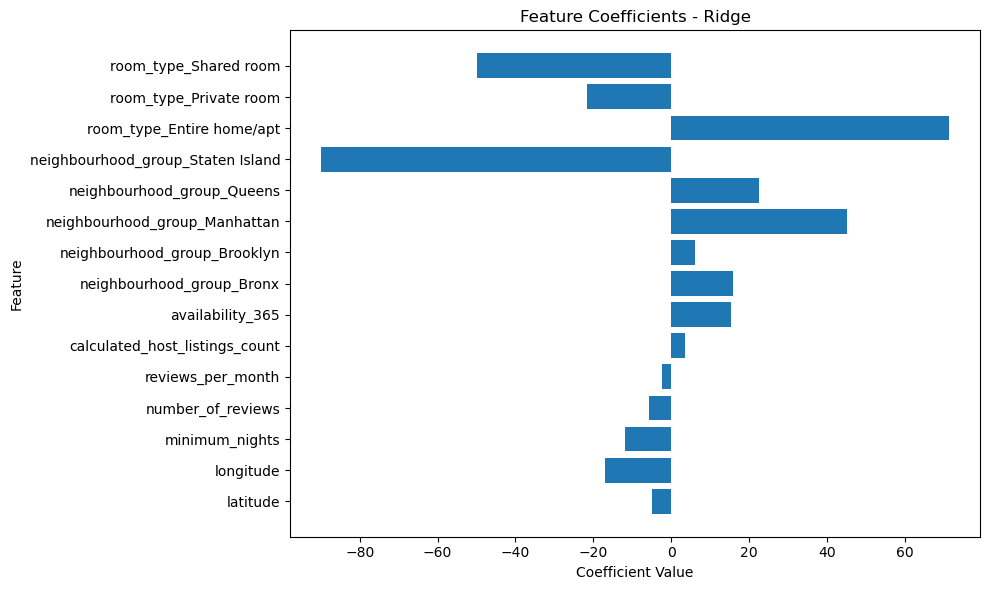

In [27]:
# Retrieve the best estimator
best_model = grid.best_estimator_

# Get feature names
cat_features = best_model.named_steps['preprocessor'].named_transformers_['onehotencoder'].get_feature_names_out()
num_features = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 
                'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
features = np.concatenate([num_features, cat_features])

# Extract coefficients for the best model
coefs = best_model.named_steps['regressor'].coef_

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.barh(features, coefs)
plt.title(f"Feature Coefficients - {type(best_model.named_steps['regressor']).__name__}")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
